In [2]:
import json
import country_converter as coco
from datetime import datetime, timedelta
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
locations_cnt = pd.read_csv("data-1670821866287.csv")
#locations_cnt.head()

In [9]:
# Setting the path to the shapefile
SHAPEFILE = '/Users/katerina/Library/CloudStorage/OneDrive-EastCarolinaUniversity/Herndon/Heatmap/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)


,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [5]:
# Drop row for 'Antarctica'.
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
# Print the map
#geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [8]:
# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=locations_cnt, how='left', left_on='country', right_on='countryname')
merged_df

# Delete some columns that we won't use
df = merged_df.drop(['geo_location_id', 'location_id', 'capitallatitude', 'capitallongitude'], axis=1)
#df.head()
#Create the indicator values
#df['case_growth_rate'] = round(df['cases']/df['cases_cum'], 2)
df['cnt_loc'].fillna(0, inplace=True) 
df.head(3)

,country,country_code,geometry,countryname,cnt_loc
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",NaN,0.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",NaN,0.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",NaN,0.0


In [10]:
eu_africa_country_list = ('IM', 'JE', 'GG', 'GB', 'MK', 'UA', 'TR', 'CH', 'SE', 'SJ', 
                   'ES', 'SI', 'SK', 'RS', 'SM', 'RO', 'PT', 'PL', 'NO', 'NL', 
                   'ME', 'MD', 'MC', 'MT', 'LU', 'LT', 'LI', 'LV', 'IT', 'IE', 
                   'IS', 'HU', 'VA', 'GR', 'GI', 'DE', 'GE', 'FR', 'AX', 'FI', 
                   'FO', 'EE', 'DK', 'CZ', 'CY', 'HR', 'BY', 'BG', 'BA', 'BE', 
                   'AM', 'AT', 'AZ', 'AD', 'AL','ZM', 'BF', 'TZ', 'EG', 'UG', 
                   'TN', 'TG', 'SZ', 'SD', 
                       'EH', 'SS', 'ZW', 'ZA', 'SO', 'SL', 'SC', 'SN', 'ST', 
                       'SH', 'RW', 'RE', 'GW', 'NG', 'NE', 'NA', 'MZ', 'MA', 
                       'MU', 'MR', 'ML', 'MW', 'MG', 'LY', 'LR', 'LS', 'KE', 
                       'CI', 'GN', 'GH', 'GM', 'GA', 'DJ', 'ER', 'ET', 'GQ', 
                       'BJ', 'CD', 'CG', 'YT', 'KM', 'TD', 'CF', 'CV', 'CM', 
                       'BI', 'BW', 'AO', 'DZ')
map_df = df[df['country_code'].isin(eu_africa_country_list)]


/opt/anaconda3/envs/pythonmaps-tutorial/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values


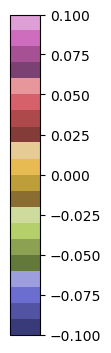

In [13]:
# Print the map
# Set the range for the choropleth
title = ' Plague heat-map from 1480B.C. t0 800A.D.'
col = 'cnt_loc'
#source = 'Source: '
vmin = map_df[col].min()
vmax = map_df[col].max()
cmap = 'tab20b'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 8))

# Remove the axis
ax.axis('off')
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
#ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
   #         verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)


/opt/anaconda3/envs/pythonmaps-tutorial/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


NameError: name 'source' is not defined

posx and posy should be finite values
posx and posy should be finite values


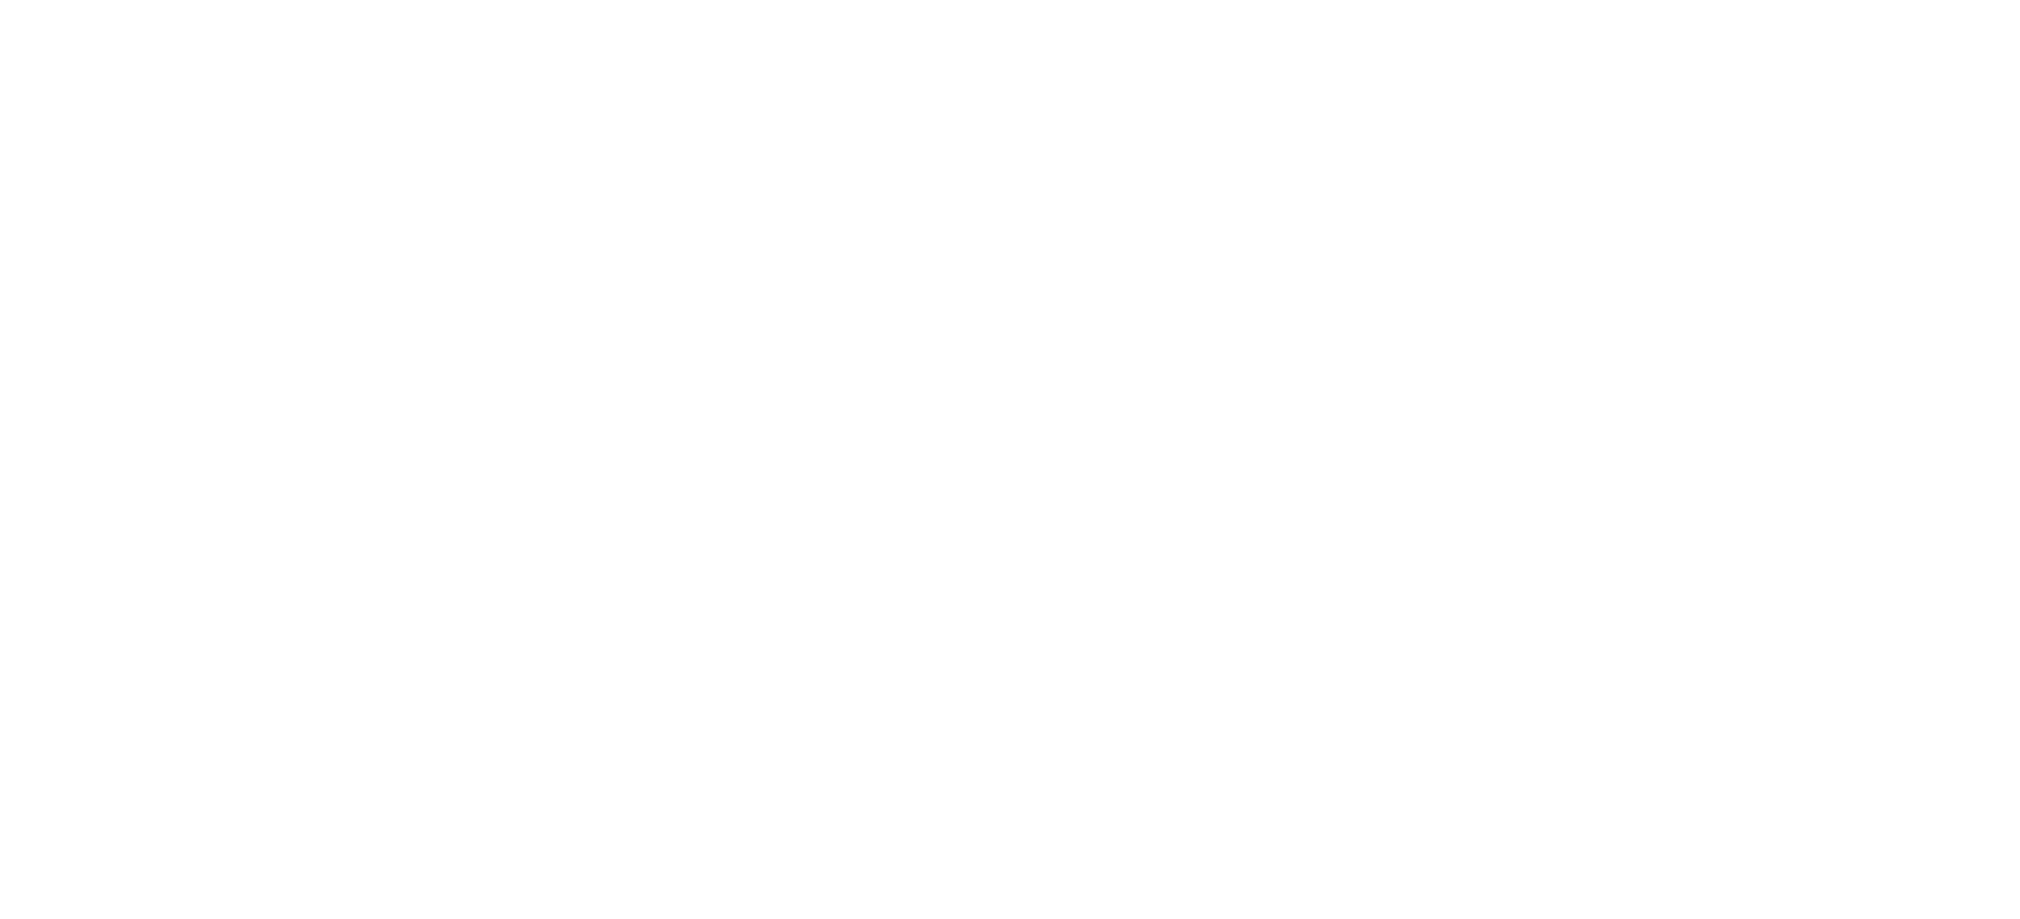

In [11]:
# Plot the map for Europe and Africa
title = ' Plague heat-map from 1480B.C. t0 800A.D.'
col = 'cnt_loc'
#source = 'Source: '
vmin = df[col].min()
vmax = df[col].max()
cmap = 'tab20b'

fig, ax = plt.subplots(1, figsize=(20, 9))
ax.axis('off')
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate(source, xy=(0.24, .08), xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom', fontsize=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbaxes = fig.add_axes([0.35, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbaxes)


In [ ]:
# Safe the map to a png
fig.savefig('map_export.png', dpi=300)